In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [8]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([                   # array of transforms for training dataset
        transforms.RandomResizedCrop(224),          # randomly crops
        transforms.RandomHorizontalFlip(),          # random horizontal flips
        transforms.ToTensor(),                      # converst to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])      # normalizes pixel values
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_dir = './hymenoptera_data/'

# stores val and train datasets in this dataset
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                                          for x in ['train', 'val']}

# 
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# chooses which device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

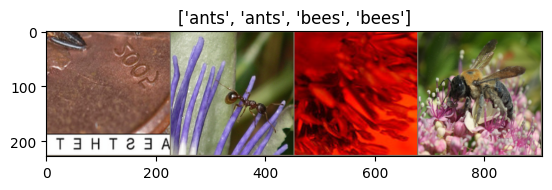

In [14]:
def imshow(inp, title=None):
    """Display image for tensor"""
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])       # standard deviation
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)    # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [16]:
# Now we are going to train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary dictionary to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        # saves the "best" model parameters and the models "state_dict"
        torch.save(model.state_dict(), best_model_params_path)
        # initialized the best accuracy variable
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f"Epoch {epoch}/{num_epochs - 1}")
            print("-" * 10)

            # each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()       # sets model to train mode
                else:
                    model.eval()        # sets model to evaluate mode

                running_loss = 0.0
                running_corrects = 0.0

                # iterate over data
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameters gradient
                    optimizer.zero_grad()

                    # forward
                    # track history only if in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    


IndentationError: expected an indented block (1601122634.py, line 44)